## Setup

We'll use the mpg dataset and predict whether a car has automatic or manual transmission.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pydataset

from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
mpg = pydataset.data('mpg')
mpg.trans = np.where(mpg.trans.str.startswith('auto'), 'auto', 'manual')

In [3]:
X, y = mpg[['displ', 'cyl', 'cty', 'hwy']], mpg.trans

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

## `.cross_val_score`

In [5]:
clf = DecisionTreeClassifier(max_depth=4)
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.6114285714285714

In [8]:
# TODO: loop through various depths and plot accuracy against depth
for depth in range(1, 11):
    clf = DecisionTreeClassifier(max_depth=depth)
    score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    print(f'{depth:2} | {score:.3f}')
    
pd.Series(scores).plot()
plt.ylabel('Accuracy')
plt.xlabel('max_depth')
plt.grid()

 1 | 0.617
 2 | 0.583
 3 | 0.600
 4 | 0.611
 5 | 0.617
 6 | 0.657
 7 | 0.651
 8 | 0.623
 9 | 0.629
10 | 0.617


NameError: name 'scores' is not defined

In [9]:
# TODO: use a metric other than accuracy
from sklearn.metrics import precision_score, make_scorer

clf = DecisionTreeClassifier(max_depth=4)
cross_val_score(clf, X_train, y_train, cv=5, scoring = make_scorer(precision_score, pos_label='manual')).mean()

0.46333333333333326

/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


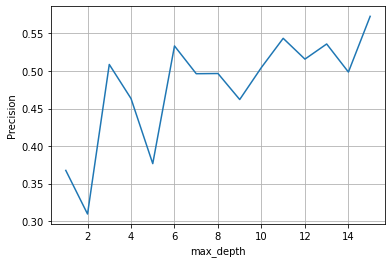

In [11]:
def evaluate_dtree(max_depth):
    clf = DecisionTreeClassifier(max_depth=max_depth)
    scorer_function = make_scorer(precision_score, pos_label='manual')
    return cross_val_score(clf, X_train, y_train, cv=5, scoring=scorer_function).mean()

pd.Series({depth: evaluate_dtree(depth) for depth in range(1,16)}).plot()
plt.ylabel('Precision')
plt.xlabel('max_depth')
plt.grid()

## Grid Search

In [12]:
clf = KNeighborsClassifier()
grid = GridSearchCV(clf, {'n_neighbors': range(1, 21)}, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 21)})

In [13]:
grid.cv_results_['mean_test_score']

array([0.59428571, 0.62857143, 0.60571429, 0.62857143, 0.61142857,
       0.61142857, 0.57142857, 0.62285714, 0.6       , 0.64      ,
       0.62285714, 0.65142857, 0.62857143, 0.62285714, 0.64      ,
       0.64      , 0.65142857, 0.63428571, 0.61714286, 0.64      ])

In [14]:
grid.cv_results_['params']

[{'n_neighbors': 1},
 {'n_neighbors': 2},
 {'n_neighbors': 3},
 {'n_neighbors': 4},
 {'n_neighbors': 5},
 {'n_neighbors': 6},
 {'n_neighbors': 7},
 {'n_neighbors': 8},
 {'n_neighbors': 9},
 {'n_neighbors': 10},
 {'n_neighbors': 11},
 {'n_neighbors': 12},
 {'n_neighbors': 13},
 {'n_neighbors': 14},
 {'n_neighbors': 15},
 {'n_neighbors': 16},
 {'n_neighbors': 17},
 {'n_neighbors': 18},
 {'n_neighbors': 19},
 {'n_neighbors': 20}]

In [15]:
# TODO: look at the best score, params
grid.best_score_, grid.best_params_

(0.6514285714285715, {'n_neighbors': 12})

In [16]:
# TODO: get the best model
grid.best_estimator_

KNeighborsClassifier(n_neighbors=12)

In [17]:
clf = DecisionTreeClassifier()
grid = GridSearchCV(clf, {'max_depth': range(1, 21), 'min_samples_leaf': range(1, 11)}, cv=10)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 21),
                         'min_samples_leaf': range(1, 11)})

In [20]:
# grid.cv_results_['params']

In [21]:
results = pd.DataFrame(grid.cv_results_['params'])
results['score'] = grid.cv_results_['mean_test_score']

In [23]:
results.sort_values(by='score').tail(30)

,max_depth,min_samples_leaf,score
47,5,8,0.638889
107,11,8,0.638889
87,9,8,0.638889
161,17,2,0.639216
151,16,2,0.639216
30,4,1,0.639542
41,5,2,0.643791
54,6,5,0.643791
42,5,3,0.644444
177,18,8,0.644771


In [ ]:
# TODO: get all the info into one list of dicts

In [ ]:
# TODO: convert to a dataframe

## Exercise

1. Use the cross validation techniques described in the lesson to find the best model for predicting transmission type with the mpg dataset.
1. Use cross validation techniques to determine the best model for predicting survival with the titanic dataset.
1. Use cross validation techniques to determine the best model for predicting tip amount with the tips dataset.